# $\textit{Punto 2}$

In [12]:
from sklearn.datasets import make_blobs, load_iris, load_breast_cancer, make_classification
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, 
                             roc_curve, auc, confusion_matrix, classification_report, 
                             mean_absolute_error, mean_squared_error, mean_squared_log_error, 
                             r2_score, explained_variance_score, mean_absolute_percentage_error)
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import RocCurveDisplay
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from bayes_opt import BayesianOptimization
from imblearn.over_sampling import ADASYN
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import seaborn as sns
import mglearn
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [15]:
class Datos:
  def __init__(self, X, y) -> None:
    self.X_train, self.y_train, self.X_test, self.y_test = self._load_data(X, y)
  def _load_data(self, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 11)
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    return X_train, y_train, X_test, y_test
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.savefig('conf1_2.png', dpi=300, bbox_inches='tight')
    plt.show()


## $\textit{Clasificación sin ADASYN}$

In [5]:
'''X = pd.read_parquet('/content/drive/My Drive/X_clasificacion.parquet')
y= pd.read_parquet('/content/drive/My Drive/y_clasificacion.parquet')'''

![](imgs_punto2//output.png)

In [52]:
'''datos = Datos(X, y)'''

'datos = Datos(X, y)'

### $\textit{Clasificasión Bayesiana}$

#### $\textit{Pipeline y GridsearchCV}$

In [2]:
'''start_time = time.time()
pipe = Pipeline([ ('scaler', StandardScaler()),  ('classifier', GaussianNB())])
grid_gauss = GridSearchCV(pipe, {}, cv=5, scoring='accuracy')
grid_gauss.fit(datos.X_train, datos.y_train)
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")'''

'start_time = time.time()\npipe = Pipeline([ (\'scaler\', StandardScaler()),  (\'classifier\', GaussianNB())])\ngrid_gauss = GridSearchCV(pipe, {}, cv=5, scoring=\'accuracy\')\ngrid_gauss.fit(datos.X_train, datos.y_train)\nend_time = time.time()\nprint(f"Tiempo de ejecución: {end_time - start_time} segundos")'

Tiempo de ejecución: 101.63016390800476 segundos

In [23]:
'''y_pred = grid_gauss.predict(datos.X_test)
print(f"Accuracy del mejor modelo en el conjunto de prueba: {accuracy_score(datos.y_test, y_pred)}")
dix_predicts_for_plot['GaussianNB'] = y_pred'''

Accuracy del mejor modelo en el conjunto de prueba: 0.8376281670707799




```
Accuracy del mejor modelo en el conjunto de prueba: 0.8376281670707799
```



In [6]:
pd.DataFrame({'precission': [0.6836017036077661],
 'f1_score': [0.665402015891087],
 'recall': [0.6481462665509323],
 'AUC': [0.7743156226533143],
 'M': [0.7289586631305403]})

,precission,f1_score,recall,AUC,M
0,0.683602,0.665402,0.648146,0.774316,0.728959


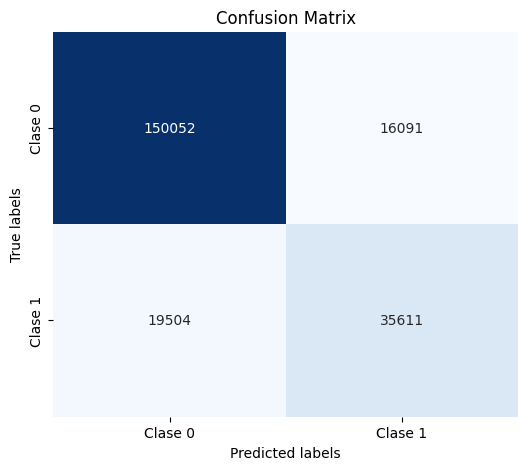

In [20]:
cm = np.array(([[150052,  16091],
       [ 19504,  35611]]))
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)

Para la "Clase 0", se predijeron correctamente 150,052 casos (verdaderos negativos) y se clasificaron incorrectamente 16,091 como "Clase 1" (falsos positivos). Para la "Clase 1", el modelo clasificó correctamente 35,611 casos (verdaderos positivos) y cometió 19,504 errores al clasificarlos como "Clase 0" (falsos negativos). Los indicadores de rendimiento ubicados en la parte superior del gráfico incluyen precisión (0.6836), puntaje F1 (0.6654), recall (0.6481), AUC (0.7743), y una métrica adicional "M" con un valor de 0.7289. Esto refleja un desempeño moderado del modelo, con un balance entre las clases y errores en ambos tipos de predicción.

#### $\textit{Optimizacion Bayesiana}$

In [7]:
'''def optimize_gaussian_nb(var_smoothing):
    gnb = GaussianNB(var_smoothing=10**var_smoothing)
    gnb.fit(datos.X_train, datos.y_train)
    y_pred = gnb.predict(datos.X_test)
    accuracy = accuracy_score(datos.y_test, y_pred)
    return accuracy

bayes_optimizer = BayesianOptimization(
    f=optimize_gaussian_nb,
    pbounds={'var_smoothing': (-10, -1)},  random_state=42,verbose=2)
start_time = time.time()
bayes_optimizer.maximize(init_points=5, n_iter=20)
print("Mejor valor de var_smoothing: ", 10**bayes_optimizer.max['params']['var_smoothing'])
print("Mejor precisión obtenida: ", bayes_optimizer.max['target'])'''

'def optimize_gaussian_nb(var_smoothing):\n    gnb = GaussianNB(var_smoothing=10**var_smoothing)\n    gnb.fit(datos.X_train, datos.y_train)\n    y_pred = gnb.predict(datos.X_test)\n    accuracy = accuracy_score(datos.y_test, y_pred)\n    return accuracy\n\nbayes_optimizer = BayesianOptimization(\n    f=optimize_gaussian_nb,\n    pbounds={\'var_smoothing\': (-10, -1)},  random_state=42,verbose=2)\nstart_time = time.time()\nbayes_optimizer.maximize(init_points=5, n_iter=20)\nprint("Mejor valor de var_smoothing: ", 10**bayes_optimizer.max[\'params\'][\'var_smoothing\'])\nprint("Mejor precisión obtenida: ", bayes_optimizer.max[\'target\'])'



```
|   iter    |  target   | var_sm... |
-------------------------------------
| 1         | 0.8393    | -6.629    |
| 2         | 0.7548    | -1.444    |
| 3         | 0.8274    | -3.412    |
| 4         | 0.8415    | -4.612    |
| 5         | 0.8391    | -8.596    |
| 6         | 0.8391    | -10.0     |
| 7         | 0.8399    | -5.621    |
| 8         | 0.8392    | -7.644    |
| 9         | 0.8391    | -9.374    |
| 10        | 0.8406    | -5.019    |
| 11        | 0.8428    | -4.245    |
| 12        | 0.8428    | -4.101    |
| 13        | 0.8429    | -4.168    |
| 14        | 0.8429    | -4.164    |
| 15        | 0.8429    | -4.166    |
| 16        | 0.8429    | -4.164    |
| 17        | 0.8429    | -4.164    |
| 18        | 0.8429    | -4.163    |
| 19        | 0.8429    | -4.163    |
| 20        | 0.8429    | -4.163    |
| 21        | 0.8429    | -4.164    |
| 22        | 0.8429    | -4.163    |
| 23        | 0.8429    | -4.163    |
| 24        | 0.8429    | -4.163    |
| 25        | 0.8429    | -4.162    |
=====================================
Mejor valor de var_smoothing:  6.88115652271368e-05
Mejor precisión obtenida:  0.8429480515958745
```



In [8]:
'''mejor_var_smoothing = 10**bayes_optimizer.max['params']['var_smoothing']
mejor_modelo = GaussianNB(var_smoothing=mejor_var_smoothing)
mejor_modelo.fit(datos.X_train, datos.y_train)
y_pred_mejor = mejor_modelo.predict(datos.X_test)
accuracy_mejor = accuracy_score(datos.y_test, y_pred_mejor)
print(f"Precisión con el mejor var_smoothing: {accuracy_mejor}")
print(f"Predicciones del modelo: {y_pred_mejor}")
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")'''

'mejor_var_smoothing = 10**bayes_optimizer.max[\'params\'][\'var_smoothing\']\nmejor_modelo = GaussianNB(var_smoothing=mejor_var_smoothing)\nmejor_modelo.fit(datos.X_train, datos.y_train)\ny_pred_mejor = mejor_modelo.predict(datos.X_test)\naccuracy_mejor = accuracy_score(datos.y_test, y_pred_mejor)\nprint(f"Precisión con el mejor var_smoothing: {accuracy_mejor}")\nprint(f"Predicciones del modelo: {y_pred_mejor}")\nend_time = time.time()\nprint(f"Tiempo de ejecución: {end_time - start_time} segundos")'



```
Precisión con el mejor var_smoothing: 0.8415020142993196
Predicciones del modelo: [0 0 0 ... 0 0 0]
Tiempo de ejecución: 347.50248670578003 segundos
```



In [11]:
pd.DataFrame({'precission': [0.7031924072476272],
 'f1_score': [0.6642247315633134],
 'recall': [0.6293491103647084],
 'AUC': [0.770614293008771],
 'M': [0.7369033501281992]})

,precission,f1_score,recall,AUC,M
0,0.703192,0.664225,0.629349,0.770614,0.736903


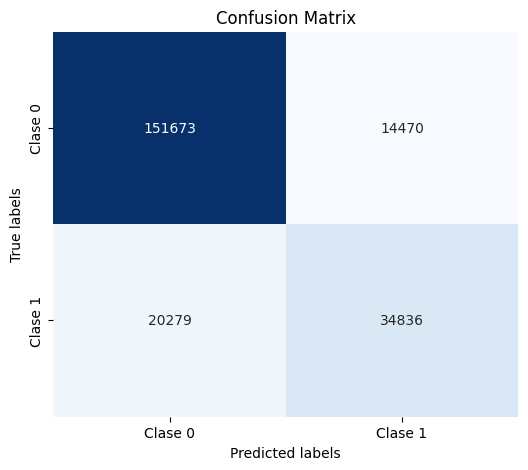

In [21]:
cm = np.array(([[151673,14470],
       [ 20279,34836]]))
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)

En este caso, el modelo predijo correctamente 151,673 casos como "Clase 0" (verdaderos negativos), mientras que 14,470 fueron clasificados incorrectamente como "Clase 1" (falsos positivos). Para la "Clase 1", 34,836 predicciones fueron correctas (verdaderos positivos), y 20,279 casos fueron clasificados erróneamente como "Clase 0" (falsos negativos). Los indicadores de rendimiento en la parte superior muestran una precisión de 0.7032, un puntaje F1 de 0.6642, un recall de 0.6293, un AUC de 0.7706, y la métrica "M" con un valor de 0.7369. Este modelo tiene un desempeño ligeramente mejor en términos de precisión en comparación con el anterior, pero sigue mostrando un nivel considerable de errores, especialmente en los falsos negativos.

### $\textit{Knn}$

#### $\textit{Pipeline y GridsearchCV}$

In [ ]:
'''start_time = time.time()
param_grid = {
    'classifier__n_neighbors': [i for i in range(1,20)]}
pipe = Pipeline([ ('scaler', StandardScaler()),  ('classifier', KNeighborsClassifier())])
grid_knn = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_knn.fit(datos.X_train, datos.y_train)
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")

y_pred = grid_knn.predict(data_1.X_test[:len(data_1.X_train)])
print(f"Accuracy del mejor modelo en el conjunto de prueba: {accuracy_score(data_1.y_test[:len(data_1.X_train)], y_pred)}")
'''

Tiempo de ejecución: 176.43437218666077 segundos \
Accuracy del mejor modelo en el conjunto de prueba: 0.8537725189597665

In [13]:
pd.DataFrame({'precission': [0.751871611737372],
 'f1_score': [0.6835918399280224],
 'recall': [0.6266810112963959],
 'AUC': [0.7784920574223447],
 'M': [0.7651818345798584]})

,precission,f1_score,recall,AUC,M
0,0.751872,0.683592,0.626681,0.778492,0.765182


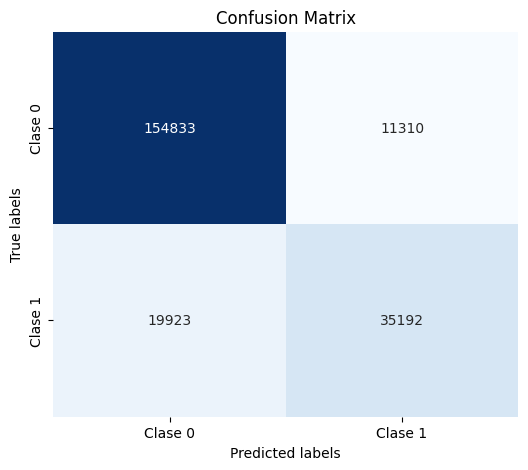

In [22]:
cm = np.array(([[154833,  11310],
       [19923, 35192]]))
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)

Se predijo correctamente 154,833 casos como "Clase 0" (verdaderos negativos), mientras que 11,310 fueron clasificados incorrectamente como "Clase 1" (falsos positivos). Para la "Clase 1", 35,192 predicciones fueron correctas (verdaderos positivos), y 19,923 casos fueron clasificados erróneamente como "Clase 0" (falsos negativos). En cuanto a las métricas de rendimiento, el modelo obtuvo una precisión de 0.7519, un puntaje F1 de 0.6836, un recall de 0.6267, un AUC de 0.7785, y la métrica "M" con un valor de 0.7652. Este modelo muestra una mejora notable en términos de precisión y menor cantidad de falsos positivos, lo que sugiere un mejor balance en el rendimiento entre las dos clases.

#### $\textit{Optimizacion Bayesiana}$

In [ ]:
def optimize_knn(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=int(n_neighbors))
    knn.fit(datos.X_train, datos.y_train)
    y_pred = knn.predict(datos.X_test)
    accuracy = accuracy_score(datos.y_test, y_pred)
    return accuracy
'''knn_optimizer = BayesianOptimization(
    f=optimize_knn,
    pbounds={'n_neighbors': (1, 20)},  
    random_state=42,
    verbose=2)
start_time = time.time()
knn_optimizer.maximize(init_points=5, n_iter=20)

print("Mejor valor de n_neighbors: ", int(knn_optimizer.max['params']['n_neighbors']))
print("Mejor precisión obtenida: ", knn_optimizer.max['target'])'''

```
|   iter    |  target   | n_neig... |
-------------------------------------
| 1         | 0.8414    | 8.116     |
| 2         | 0.8516    | 19.06     |
| 3         | 0.8472    | 14.91     |
| 4         | 0.8459    | 12.37     |
| 5         | 0.8389    | 3.964     |
| 6         | 0.8516    | 19.99     |
| 7         | 0.8516    | 19.53     |
| 8         | 0.8485    | 18.2      |
| 9         | 0.8258    | 1.0       |
| 10        | 0.8445    | 10.41     |
| 11        | 0.8435    | 5.985     |
| 12        | 0.8497    | 13.77     |
| 13        | 0.8516    | 19.27     |
| 14        | 0.8516    | 19.8      |
| 15        | 0.8516    | 19.16     |
| 16        | 0.8516    | 19.67     |
| 17        | 0.8516    | 19.91     |
| 18        | 0.8516    | 19.41     |
| 19        | 0.8516    | 19.15     |
| 20        | 0.8516    | 20.0      |
| 21        | 0.8516    | 19.73     |
| 22        | 0.8516    | 19.58     |
| 23        | 0.8516    | 19.0      |
| 24        | 0.8516    | 19.07     |
| 25        | 0.8516    | 19.35     |
=====================================
Mejor valor de n_neighbors:  19
Mejor precisión obtenida:  0.8516392627611205
```

mejor_n = knn_optimizer.max['params']['n_neighbors']
mejor_modelo = KNeighborsClassifier(n_neighbors=int(mejor_n))
mejor_modelo.fit(data_1.X_train, data_1.y_train)
y_pred_mejor = mejor_modelo.predict(data_1.X_test)
accuracy_mejor = accuracy_score(data_1.y_test, y_pred_mejor)
print(f"Precisión con el mejor var_smoothing: {accuracy_mejor}")
print(f"Predicciones del modelo: {y_pred_mejor}")
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")

Precisión con el mejor var_smoothing: 0.7509027228711808 \
Predicciones del modelo: [0 0 0 ... 0 0 0]
Tiempo de ejecución: 534.8886618614197 segundos

In [23]:
pd.DataFrame({'precission': [0.756754],
 'f1_score': [0.682819],
 'recall': [0.622045],
 'AUC': [0.777858],
 'M': [0.767306]})

,precission,f1_score,recall,AUC,M
0,0.756754,0.682819,0.622045,0.777858,0.767306


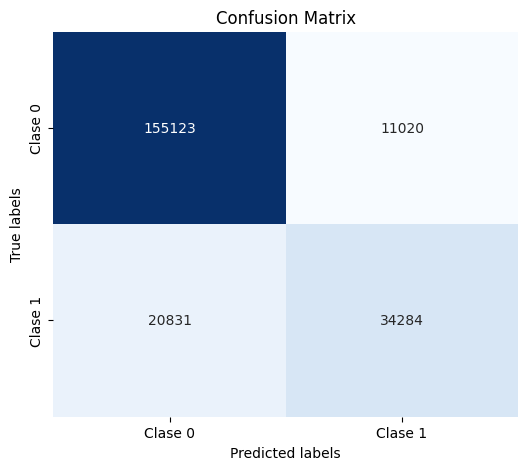

In [24]:
cm = np.array(([[155123,  11020],
       [20831, 34284]]))
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)

Se predijo correctamente 34,284 casos como "Clase 1" (verdaderos positivos), mientras que 20,831 fueron clasificados incorrectamente como "Clase 0" (falsos negativos). Las métricas de rendimiento del modelo incluyen una precisión de 0.7568, un puntaje F1 de 0.6828, un recall de 0.6220, un AUC de 0.7779, y una métrica "M" con un valor de 0.7673. Este modelo tiene un rendimiento consistente con los anteriores, con una ligera mejora en la precisión, lo que sugiere un manejo más equilibrado entre falsos positivos y falsos negativos.

### $\textit{Logistic}$

#### $\textit{Pipeline y GridsearchCV}$

In [ ]:
'''pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('logreg', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=5000))  
])
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],        
    'logreg__l1_ratio': [0.1, 0.5, 0.7, 0.9]  
}
grid_log = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_log.fit(data_1.X_train, data_1.y_train)
best_model =grid_log.best_estimator_
y_pred = best_model.predict(data_1.X_test)
accuracy = accuracy_score(data_1.y_test, y_pred)
dix['log'] = list(y_pred)
print(f"Mejor precisión: {accuracy}")
print(f"Mejores hiperparámetros: {grid_log.best_params_}")'''

Mejor precisión: 0.8690 \
Mejores hiperparámetros: {'logreg__C': 0.1, 'logreg__l1_ratio': 0.1}

In [25]:
pd.DataFrame({'precission': [0.7549113326440234], 'f1_score': [0.7275462048996936], 'recall': [0.7020956182527442], 'AUC': [0.8132400170436483], 'M': [0.7840756748438359]})

,precission,f1_score,recall,AUC,M
0,0.754911,0.727546,0.702096,0.81324,0.784076


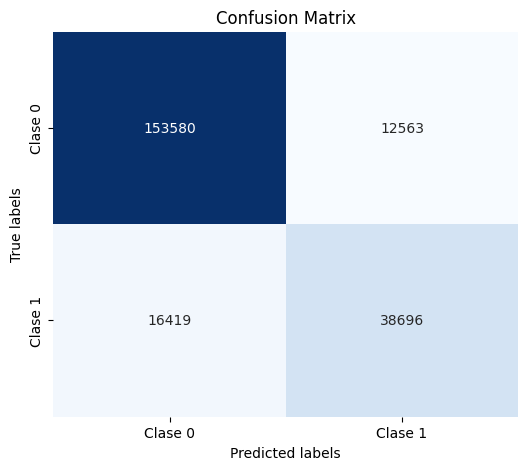

In [26]:
cm = np.array(([[153580,  12563],
       [16419, 38696]]))
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)

El modelo predijo correctamente 153,580 casos como "Clase 0" (verdaderos negativos), mientras que cometió 12,563 errores al clasificarlos incorrectamente como "Clase 1" (falsos positivos). En cuanto a la "Clase 1", el modelo predijo correctamente 38,696 casos (verdaderos positivos), y cometió 16,419 errores al clasificarlos incorrectamente como "Clase 0" (falsos negativos). Las métricas asociadas con este modelo incluyen una precisión de 0.7549, un puntaje F1 de 0.7275, un recall de 0.7021, un AUC de 0.8132, y una métrica "M" de 0.7841. Comparado con las iteraciones anteriores, este modelo muestra una mejora en el recall y un aumento en el AUC, lo que indica una mayor capacidad para distinguir entre las clases, aunque todavía existen errores considerables en ambas clases.

#### $\textit{Optimizacion Bayesiana}$

In [ ]:
def optimize_logistic_regression(C, l1_ratio):
    log = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=50, C=10**C, l1_ratio=l1_ratio)
    log.fit(data_1.X_train, data_1.y_train)
    y_pred = log.predict(data_1.X_test)
    accuracy = accuracy_score(data_1.y_test, y_pred)
    return accuracy
pbounds = {'C': (-3, 2), 'l1_ratio': (0, 1)}
'''bayes_optimizer = BayesianOptimization(f=optimize_logistic_regression, pbounds=pbounds, random_state=42, verbose=2)
start_time = time.time()
bayes_optimizer.maximize(init_points=5, n_iter=20)
print("Mejor valor de C: ", 10**bayes_optimizer.max['params']['C'])
print("Mejor valor de l1_ratio: ", bayes_optimizer.max['params']['l1_ratio'])
print("Mejor precisión obtenida: ", bayes_optimizer.max['target'])'''

```
v|   iter    |  target   |     C     | l1_ratio  |
-------------------------------------------------
| 1         | 0.7574    | -1.127    | 0.9507    |
| 2         | 0.7575    | 0.66      | 0.5987    |
| 3         | 0.7574    | -2.22     | 0.156     |
| 4         | 0.7564    | -2.71     | 0.8662    |
| 5         | 0.7574    | 0.005575  | 0.7081    |
| 6         | 0.7575    | 0.5859    | 0.5381    |
| 7         | 0.7575    | -1.291    | 0.008644  |
| 8         | 0.7575    | 1.848     | 0.004469  |
| 9         | 0.7575    | 1.998     | 0.9905    |
| 10        | 0.7574    | -0.3638   | 0.003525  |
| 11        | 0.7574    | 1.055     | 0.002725  |
| 12        | 0.7575    | 1.318     | 0.9874    |
| 13        | 0.7574    | -0.543    | 0.9995    |
| 14        | 0.7574    | -1.839    | 0.005386  |
| 15        | 0.7575    | -0.8178   | 0.4252    |
| 16        | 0.7574    | 1.572     | 0.4999    |
| 17        | 0.7574    | 0.3147    | 0.003836  |
| 18        | 0.7574    | 0.443     | 0.997     |
| 19        | 0.7575    | 1.997     | 0.4604    |
| 20        | 0.7574    | -1.457    | 0.4511    |
| 21        | 0.7574    | -2.678    | 0.002374  |
| 22        | 0.7574    | -0.8228   | 0.006424  |
| 23        | 0.7574    | -2.324    | 0.005164  |
| 24        | 0.7575    | 0.9062    | 0.9972    |
| 25        | 0.7575    | 1.44      | 0.001353  |
=================================================
Mejor valor de C:  0.05118875868829046
Mejor valor de l1_ratio:  0.00864382149691345
Mejor precisión obtenida:  0.7574641368899656
```


In [ ]:
'''mejor_C = 10**bayes_optimizer.max['params']['C']
mejor_l1 = float(bayes_optimizer.max['params']['l1_ratio'])

# Crear y entrenar el modelo de Logistic Regression con los mejores hiperparámetros
mejor_modelo = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=5000, C=mejor_C, l1_ratio=mejor_l1)
mejor_modelo.fit(data_1.X_train, data_1.y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_mejor_logreg = mejor_modelo.predict(data_1.X_test)
# Calcular la precisión
accuracy_mejor = accuracy_score(data_1.y_test, y_pred_mejor_logreg)
print(f"Precisión con el mejor C y l1_ratio: {accuracy_mejor}")
print(f"Predicciones del modelo: {y_pred_mejor_logreg}")
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")'''

Precisión con el mejor C y l1_ratio: 0.7574460584476042 \
Predicciones del modelo: [0 0 0 ... 0 0 0]

In [51]:
pd.DataFrame({'precission': [0.7549113326440234], 'f1_score': [0.7275462048996936], 'recall': [0.7020956182527442], 'AUC': [0.8132400170436483], 'M': [0.7840756748438359]})

,precission,f1_score,recall,AUC,M
0,0.754911,0.727546,0.702096,0.81324,0.784076


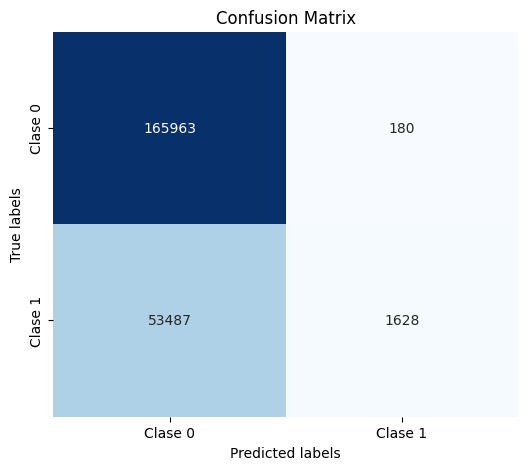

In [28]:
cm = np.array(([[165963 ,  180],
       [53487, 1628]]))
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)

solo cometió 180 errores al clasificarlos como "Clase 1" (falsos positivos). Para la "Clase 1", el rendimiento es significativamente menor, con solo 1,628 predicciones correctas (verdaderos positivos) y 53,487 errores al clasificarlos como "Clase 0" (falsos negativos). Las métricas en la parte superior reflejan este comportamiento: la precisión es alta, con un valor de 0.9004, pero el puntaje F1 es extremadamente bajo (0.0572) debido al bajo recall de 0.0295. El AUC también es bajo, con un valor de 0.5142, lo que indica que el modelo no distingue bien entre las clases. Y, evidentement, hay un fuerte desbalanceo en la prediccion.     

### $\textbf{Mejor opción entre Pipeline y BayesianOptimization: :}$
Los modelos con Pipeline y GridSearchCV superaron el rendimiento de BayesianOptimization en varios aspectos clave. Aunque ambos métodos ofrecieron métricas de recall, F1-score y AUC similares, con algunas ventajas para BayesianOptimization en casos puntuales, el enfoque basado en Pipeline y GridSearchCV demostró un mejor equilibrio general en la identificación de casos positivos. Este mejor balance se reflejó en un aumento en la capacidad del modelo para detectar tanto verdaderos positivos como verdaderos negativos, lo que es crucial en contextos donde las clases tienen un peso similar; El caso es especialmente acentuado en el modelo logístico, donde las métricas parecen indicar un buen rendimiento, pero al observar la matriz de confusión, se evidencia un desbalance inaceptable entre las clases.

Adicionalmente, uno de los aspectos más significativos fue el tiempo de cómputo. El uso de Pipeline y GridSearchCV resultó ser considerablemente más eficiente, reduciendo el tiempo necesario para ajustar los hiperparámetros y entrenar el modelo en comparación con BayesianOptimization. Este ahorro de tiempo no solo permite iterar con mayor rapidez durante el proceso de modelado, sino que también ofrece una solución más escalable para grandes volúmenes de datos o cuando es necesario realizar múltiples experimentos.

In [53]:
pd.DataFrame({ '':['Clasificasión Bayesiana','K-NN','L1/L2 Penalty Logistic Regression']
    ,'precission': [0.6836017036077661,0.751871611737372, 0.756754],
 'f1_score': [0.665402015891087,0.6835918399280224, 0.682819],
 'recall': [0.6481462665509323,0.6266810112963959, 0.622045],
 'AUC': [0.7743156226533143,0.7784920574223447, 0.777858],
 'M': [0.7289586631305403,0.7651818345798584,00.767306]})


,,precission,f1_score,recall,AUC,M
0,Clasificasión Bayesiana,0.683602,0.665402,0.648146,0.774316,0.728959
1,K-NN,0.751872,0.683592,0.626681,0.778492,0.765182
2,L1/L2 Penalty Logistic Regression,0.756754,0.682819,0.622045,0.777858,0.767306


## $\textit{Clasificación con ADASYN}$

![](imgs_punto2//output4.png)

```
print(f"Original dataset shape: {Counter(y)}")
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)
print(f'Resampled dataset shape: {Counter(y_res)}')

Original dataset shape: Counter({0: 4153582, 1: 1377869})
Resampled dataset shape: Counter({0: 4153582, 1: 4008392})

```
Con el metodo ADASYN logramos equilibrar la clase objetivo.

In [ ]:
'''datos_ada = Datos(X_ada, y_ada)'''

### $\textit{Clasificasión Bayesiana}$

#### $\textit{Pipeline y GridsearchCV}$

In [ ]:
'''start_time = time.time()
pipe = Pipeline([ ('scaler', StandardScaler()),  ('classifier', GaussianNB())])
grid_gauss = GridSearchCV(pipe, {}, cv=5, scoring='accuracy')
grid_gauss.fit(datos.X_train, datos.y_train)
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")'''

Accuracy del mejor modelo en el conjunto de prueba: 0.7024621475513158

In [32]:
scores = { 'precission':[0.831615],
 'f1_score':[0.63954],
 'recall':[0.519543],
  'AUC': [0.705453	],
  'M':[.768534]
}
pd.DataFrame(scores)

,precission,f1_score,recall,AUC,M
0,0.831615,0.63954,0.519543,0.705453,0.768534


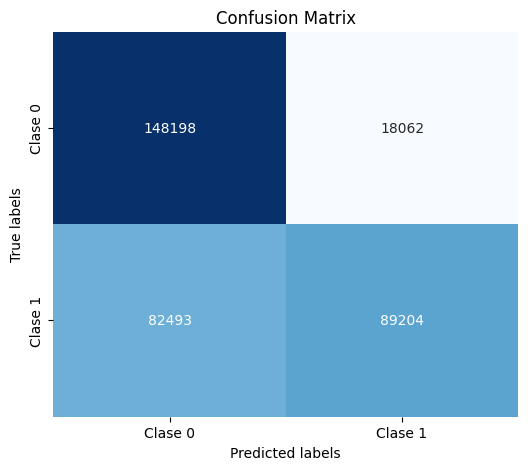

In [33]:
cm = np.array(([[148198,  18062],
       [82493, 89204]]))
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)

Para la "Clase 0", el modelo predijo correctamente 148,198 casos (verdaderos negativos) y clasificó incorrectamente 18,062 casos como "Clase 1" (falsos positivos). Para la "Clase 1", se identificaron correctamente 89,204 casos (verdaderos positivos) y 82,493 fueron clasificados incorrectamente como "Clase 0" (falsos negativos). Las métricas principales del modelo incluyen una precisión de 0.8316, un F1-score de 0.6395, un recall de 0.5195, un AUC de 0.7055, y una métrica adicional M de 0.7685. Estas métricas sugieren que el modelo tiene un buen nivel de precisión, pero su capacidad para identificar correctamente los casos positivos (recall) es moderada, lo que indica la necesidad de mejorar la detección de verdaderos positivos.

#### $\textit{Optimizacion Bayesiana}$

In [ ]:
'''def optimize_gaussian_nb(var_smoothing):
    gnb = GaussianNB(var_smoothing=10**var_smoothing)
    gnb.fit(data_1.X_train, data_1.y_train)
    y_pred = gnb.predict(data_1.X_test)
    accuracy = accuracy_score(data_1.y_test, y_pred)
    return accuracy

bayes_optimizer = BayesianOptimization(
    f=optimize_gaussian_nb,
    pbounds={'var_smoothing': (-10, -1)},  random_state=42,verbose=2)
start_time = time.time()
bayes_optimizer.maximize(init_points=5, n_iter=20)
print("Mejor valor de var_smoothing: ", 10**bayes_optimizer.max['params']['var_smoothing'])
print("Mejor precisión obtenida: ", bayes_optimizer.max['target'])'''

```
|   iter    |  target   | var_sm... |
-------------------------------------
| 1         | 0.705     | -6.629    |
| 2         | 0.5023    | -1.444    |
| 3         | 0.6389    | -3.412    |
| 4         | 0.7087    | -4.612    |
| 5         | 0.7025    | -8.596    |
| 6         | 0.7025    | -10.0     |
| 7         | 0.7098    | -5.554    |
| 8         | 0.7029    | -7.621    |
| 9         | 0.7105    | -5.054    |
| 10        | 0.7025    | -9.376    |
| 11        | 0.7078    | -6.016    |
| 12        | 0.7102    | -4.863    |
| 13        | 0.7104    | -5.28     |
| 14        | 0.7105    | -5.152    |
| 15        | 0.7105    | -5.145    |
| 16        | 0.7106    | -5.068    |
| 17        | 0.7105    | -5.158    |
| 18        | 0.7105    | -5.047    |
| 19        | 0.7106    | -5.136    |
| 20        | 0.7106    | -5.126    |
| 21        | 0.7105    | -5.16     |
| 22        | 0.7106    | -5.09     |
| 23        | 0.7106    | -5.095    |
| 24        | 0.7106    | -5.097    |
| 25        | 0.7106    | -5.103    |
=====================================
Mejor valor de var_smoothing:  7.489734927704792e-06
Mejor precisión obtenida:  0.710575605772332
```

In [ ]:
'''
mejor_var_smoothing = 10**bayes_optimizer.max['params']['var_smoothing']
mejor_modelo = GaussianNB(var_smoothing=mejor_var_smoothing)
mejor_modelo.fit(data_1.X_train, data_1.y_train)
y_pred_mejor = mejor_modelo.predict(data_1.X_test)
accuracy_mejor = accuracy_score(data_1.y_test, y_pred_mejor)
print(f"Precisión con el mejor var_smoothing: {accuracy_mejor}")
print(f"Predicciones del modelo: {y_pred_mejor}")
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")
'''

Precisión con el mejor var_smoothing: 0.710575605772332 \
Predicciones del modelo: [1 0 0 ... 0 0 1]\
Tiempo de ejecución: 39.60585927963257 segundos

In [48]:
scores = { 'precission':[0.82215],
 'f1_score':[0.6454],
 'recall':[0.535743],
  'AUC': [0.733	],
  'M':[.7123]
}
pd.DataFrame(scores)

,precission,f1_score,recall,AUC,M
0,0.82215,0.6454,0.535743,0.733,0.7123


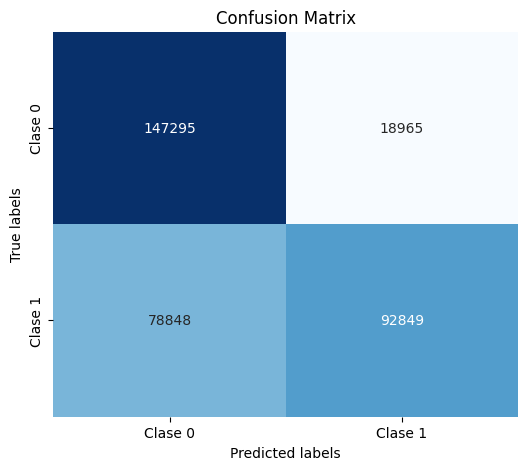

In [34]:
cm = np.array(([[147295,  18965],
       [78848, 92849]]))
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)

Se ha identificado correctamente 147,295 casos de "Clase 0" (verdaderos negativos) y ha clasificado erróneamente 18,965 como "Clase 1" (falsos positivos). En cuanto a la "Clase 1", el modelo ha clasificado correctamente 92,849 casos (verdaderos positivos) y ha cometido 78,848 errores clasificándolos como "Clase 0" (falsos negativos). Las métricas del modelo reflejan una precisión de 0.8221, un F1-score de 0.6454, un recall de 0.5357, un AUC de 0.733 y una métrica M de 0.7123. Aunque el modelo tiene una buena precisión, su capacidad para recuperar todos los casos positivos (recall) es moderada, lo que indica que el modelo aún podría mejorar en la identificación de la "Clase 1".

### $\textit{Knn}$

#### $\textit{Pipeline y GridsearchCV}$

In [ ]:
'''
start_time = time.time()
param_grid = {
    'classifier__n_neighbors': [i for i in range(1,20)]}
pipe = Pipeline([ ('scaler', StandardScaler()),  
        ('classifier', KNeighborsClassifier())])
grid_knn = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(data_1.X_train, data_1.y_train)
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")
y_pred = grid_knn.predict(data_1.X_test)
dix['knn'] = y_pred
print(f"Accuracy del mejor modelo en el conjunto de prueba: {accuracy_score(data_1.y_test, y_pred)}")

'''

Tiempo de ejecución: 477.20 segundos \
Accuracy del mejor modelo en el conjunto de prueba: 0.8347008643111402

In [35]:
scores = { 'precission':[0.8050],
 'f1_score':[0.845],
 'recall':[0.8901],
  'AUC': [0.8337],
  'M':[0.81943]
}
pd.DataFrame(scores)

,precission,f1_score,recall,AUC,M
0,0.805,0.845,0.8901,0.8337,0.81943


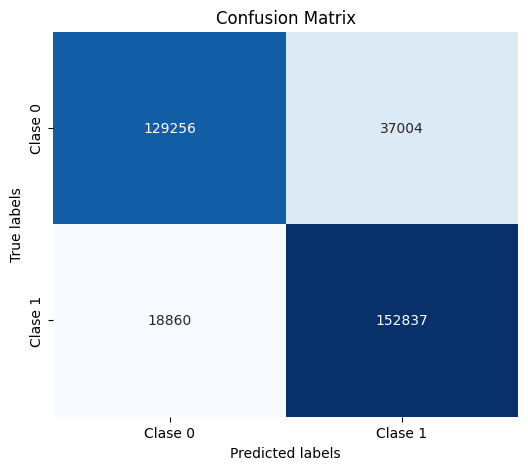

In [36]:
cm = np.array(([[129256,  37004],
       [18860, 152837]]))
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)

El modelo ha identificado correctamente 129,256 casos de la "Clase 0" (verdaderos negativos) y ha clasificado incorrectamente 37,004 casos como "Clase 1" (falsos positivos). Para la "Clase 1", el modelo ha clasificado correctamente 152,837 casos (verdaderos positivos), y ha cometido 18,860 errores clasificándolos como "Clase 0" (falsos negativos). Las métricas asociadas reflejan una precisión de 0.805, un F1-score de 0.845, un recall de 0.8901, un AUC de 0.8337, y una métrica M de 0.8194. Estas métricas sugieren un modelo con buen rendimiento general, especialmente en la identificación de la "Clase 1" (recall alto), lo que indica que el modelo es efectivo para detectar la clase positiva, aunque todavía comete algunos errores en la identificación de la "Clase 0".

#### $\textit{Optimizacion Bayesiana}$

In [ ]:
'''

def optimize_knn(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=int(n_neighbors))
    knn.fit(data_1.X_train, data_1.y_train)
    y_pred = knn.predict(data_1.X_test)
    accuracy = accuracy_score(data_1.y_test, y_pred)
    return accuracy
knn_optimizer = BayesianOptimization(
    f=optimize_knn,
    pbounds={'n_neighbors': (1, 20)},  
    random_state=42,
    verbose=2)
start_time = time.time()
knn_optimizer.maximize(init_points=5, n_iter=20)

print("Mejor valor de n_neighbors: ", int(knn_optimizer.max['params']['n_neighbors']))
print("Mejor precisión obtenida: ", knn_optimizer.max['target'])
'''


```
|   iter    |  target   | n_neig... |
-------------------------------------
| 1         | 0.8249    | 8.116     |
| 2         | 0.8242    | 19.06     |
| 3         | 0.8256    | 14.91     |
| 4         | 0.8258    | 12.37     |
| 5         | 0.8294    | 3.964     |
| 6         | 0.8294    | 3.176     |
| 7         | 0.8352    | 1.003     |
| 8         | 0.8352    | 1.544     |
| 9         | 0.828     | 5.783     |
| 10        | 0.8352    | 1.274     |
| 11        | 0.8352    | 1.866     |
| 12        | 0.8258    | 10.32     |
| 13        | 0.8352    | 1.73      |
| 14        | 0.8252    | 16.89     |
| 15        | 0.8352    | 1.119     |
| 16        | 0.8352    | 1.413     |
| 17        | 0.8022    | 2.001     |
| 18        | 0.828     | 5.376     |
| 19        | 0.8352    | 1.802     |
| 20        | 0.8352    | 1.274     |
| 21        | 0.8352    | 1.635     |
| 22        | 0.8254    | 13.63     |
| 23        | 0.82      | 4.381     |
| 24        | 0.8294    | 3.703     |
| 25        | 0.8294    | 3.438     |
=====================================
Mejor valor de n_neighbors:  1
Mejor precisión obtenida:  0.8352453122734549
```


In [ ]:
'''mejor_n = int(knn_optimizer.max['params']['n_neighbors'])
mejor_modelo =  KNeighborsClassifier(n_neighbors=int(mejor_n))
mejor_modelo.fit(data_1.X_train, data_1.y_train)
y_pred_mejor_knn = mejor_modelo.predict(data_1.X_test)
accuracy_mejor = accuracy_score(data_1.y_test, y_pred_mejor_knn )
print(f"Precisión con el mejor n: {accuracy_mejor}")
print(f"Predicciones del modelo: {y_pred_mejor_knn }")
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")'''


Precisión con el mejor n: 0.8352453122734549 \
Predicciones del modelo: [1 1 0 ... 1 0 1] \
Tiempo de ejecución: 1148.0673167705536 segundos \

In [38]:
scores = { 'precission':[0.8055],
 'f1_score':[0.845],
 'recall':[0.890],
  'AUC': [0.834],
  'M':[0.8199]
}
(pd.DataFrame(scores))

,precission,f1_score,recall,AUC,M
0,0.8055,0.845,0.89,0.834,0.8199


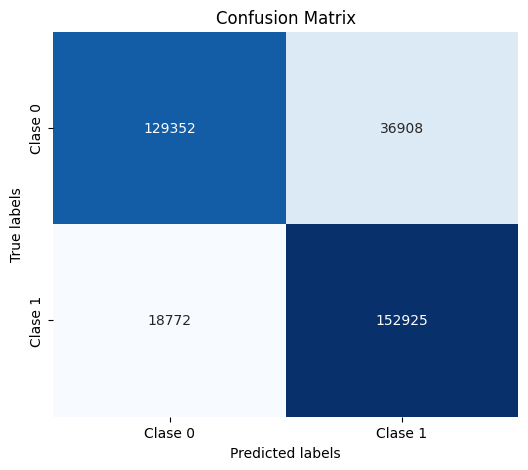

In [39]:
cm = np.array(([[129352,  36908],
       [18772, 152925]]))
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)

La clasificacion fue hecha correctamente 129,352 casos de la "Clase 0" (verdaderos negativos) y ha cometido 36,908 errores clasificando falsamente como "Clase 1" (falsos positivos). En la "Clase 1", el modelo ha identificado correctamente 152,925 casos (verdaderos positivos), mientras que 18,772 fueron clasificados incorrectamente como "Clase 0" (falsos negativos). Las métricas indican un buen rendimiento, con una precisión de 0.8055, un F1-score de 0.845, un recall de 0.89, un AUC de 0.834, y una métrica M de 0.8199. Estas cifras demuestran un balance adecuado en la identificación tanto de verdaderos positivos como de verdaderos negativos, con un fuerte rendimiento en la detección de la "Clase 1". Sin embargo, hay un número considerable de falsos positivos que podrían mejorarse para optimizar el rendimiento general.

### $\textit{Logistic}$

#### $\textit{Pipeline y GridsearchCV}$

In [ ]:
'''pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('logreg', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=50))  
])
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],        
    'logreg__l1_ratio': [0.1, 0.5, 0.7, 0.9]  
}
grid_log = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_log.fit(data_1.X_train, data_1.y_train)
best_model =grid_log.best_estimator_
y_pred = best_model.predict(data_1.X_test)
accuracy = accuracy_score(data_1.y_test, y_pred)
dix['log'] = list(y_pred)
print(f"Mejor precisión: {accuracy}")
print(f"Mejores hiperparámetros: {grid_log.best_params_}")'''

Mejor precisión: 0.8344 \
Mejores hiperparámetros: {'logreg__C': 0.01, 'logreg__l1_ratio': 0.7}

In [40]:
pd.DataFrame({'precission': [0.8199032748376399], 'f1_score': [0.8413598697755671], 'recall': [0.8639696674956464], 'AUC': [0.8339937354680205], 'M': [0.8269485051528302]})

,precission,f1_score,recall,AUC,M
0,0.819903,0.84136,0.86397,0.833994,0.826949


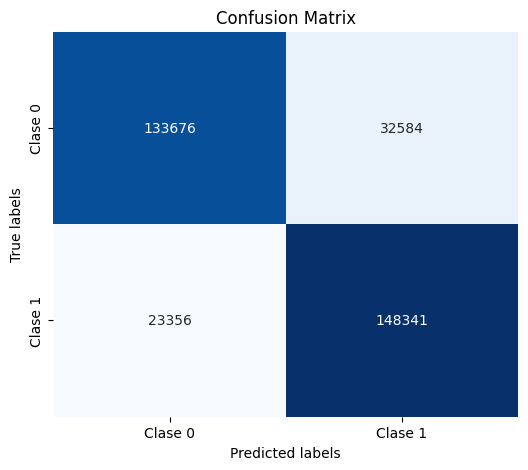

In [41]:
cm = np.array(([[133676,  32584],
       [23356, 148341]]))
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)

En esta matriz de confusión, el modelo ha clasificado correctamente 133,676 casos de la "Clase 0" (verdaderos negativos) y ha cometido 32,584 errores clasificándolos incorrectamente como "Clase 1" (falsos positivos). Para la "Clase 1", el modelo ha identificado correctamente 148,341 casos (verdaderos positivos), mientras que 23,356 fueron clasificados erróneamente como "Clase 0" (falsos negativos). Las métricas asociadas muestran una precisión de 0.8199, un F1-score de 0.8414, un recall de 0.8639, un AUC de 0.834, y una métrica M de 0.8269. Estos resultados sugieren que el modelo tiene un buen rendimiento general, especialmente en la detección de la "Clase 1" (alto recall), lo que indica que está capturando la mayoría de los casos positivos correctamente, aunque todavía hay margen para mejorar en la reducción de los falsos positivos.

#### $\textit{Optimizacion Bayesiana}$

In [ ]:
'''
def optimize_logistic_regression(C, l1_ratio):
    log = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=50, C=10**C, l1_ratio=l1_ratio)
    log.fit(data_1.X_train, data_1.y_train)
    y_pred = log.predict(data_1.X_test)
    accuracy = accuracy_score(data_1.y_test, y_pred)
    return accuracy
pbounds = {'C': (-3, 2), 'l1_ratio': (0, 1)}
bayes_optimizer = BayesianOptimization(f=optimize_logistic_regression, pbounds=pbounds, random_state=42, verbose=2)
start_time = time.time()
bayes_optimizer.maximize(init_points=5, n_iter=20)
print("Mejor valor de C: ", 10**bayes_optimizer.max['params']['C'])
print("Mejor valor de l1_ratio: ", bayes_optimizer.max['params']['l1_ratio'])
print("Mejor precisión obtenida: ", bayes_optimizer.max['target'])

mejor_C = 10**bayes_optimizer.max['params']['C']
mejor_l1 = float(bayes_optimizer.max['params']['l1_ratio'])
mejor_modelo = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=50, C=mejor_C, l1_ratio=mejor_l1)
mejor_modelo.fit(data_1.X_train, data_1.y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_mejor_logreg = mejor_modelo.predict(data_1.X_test)
# Calcular la precisión
accuracy_mejor = accuracy_score(data_1.y_test, y_pred_mejor_logreg)
print(f"Precisión con el mejor C y l1_ratio: {accuracy_mejor}")
print(f"Predicciones del modelo: {y_pred_mejor_logreg}")

print(f"Tiempo de ejecución: {end_time - start_time} segundos")

'''

Precisión con el mejor C y l1_ratio: 0.796 \
Predicciones del modelo: [1 1 0 ... 1 0 1] \
Tiempo de ejecución: 1148.0673167705536 segundos \

In [42]:
pd.DataFrame({
    'precision': [ 0.787193],
    'f1_score': [0.80384],
    'recall': [0.8212],
    'AUC': [.7959],
    'M': [ 0.7915]
})

,precision,f1_score,recall,AUC,M
0,0.787193,0.80384,0.8212,0.7959,0.7915


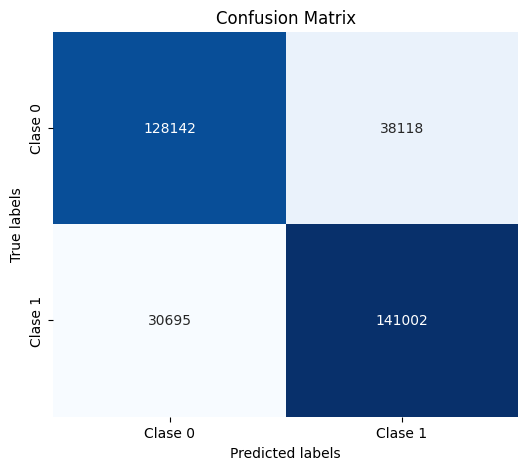

In [43]:
cm = np.array(([[128142,  38118],
       [30695, 141002]]))
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)

El modelo ha clasificado correctamente 128,142 casos de la "Clase 0" (verdaderos negativos) y ha cometido 38,118 errores al clasificarlos incorrectamente como "Clase 1" (falsos positivos). Para la "Clase 1", el modelo ha identificado correctamente 141,002 casos (verdaderos positivos), mientras que 30,695 fueron clasificados erróneamente como "Clase 0" (falsos negativos). Las métricas muestran una precisión de 0.7872, un F1-score de 0.8038, un recall de 0.8212, un AUC de 0.7959, y una métrica M de 0.7915. Estos resultados indican que el modelo tiene un rendimiento aceptable en la identificación de ambas clases, aunque aún existen errores notables en la clasificación de la "Clase 0"

In [55]:
data = {
    "": ['Clasificasión Bayesiana','K-NN','L1/L2 Penalty Logistic Regression'],
    "precision": [0.8316, 0.8055, 0.8199],
    "f1_score": [0.6395, 0.845, 0.8414],
    "recall": [0.5195, 0.89, 0.8639],
    "AUC": [0.7055, 0.834, 0.834],
    "M": [0.7685, 0.8199, 0.8269]
}
pd.DataFrame(data)

,,precision,f1_score,recall,AUC,M
0,Clasificasión Bayesiana,0.8316,0.6395,0.5195,0.7055,0.7685
1,K-NN,0.8055,0.8450,0.8900,0.8340,0.8199
2,L1/L2 Penalty Logistic Regression,0.8199,0.8414,0.8639,0.8340,0.8269


## $\textit{Conclusiones}$

+ $$\textbf{\textit{Computo}}$$ 

En términos de cómputo, los tiempos de ejecución fueron prácticamente los mismos tanto para los modelos entrenados sin la técnica de sobremuestreo ADASYN como para los que se entrenaron con ella. Esto sugiere que la inclusión de ADASYN en el proceso no impuso una sobrecarga significativa en el tiempo total de cómputo. De este modo, la aplicación de ADASYN mejora el balance de clases sin comprometer la eficiencia del entrenamiento de los modelos, lo que es beneficioso para casos donde el tiempo es una variable importante.
+ $$\textbf{\textit{Metricas}}$$ 


La tabla de métricas sin el balanceo ADASYN: 

| Modelo                            | precision | f1_score | recall  | AUC    | M      |
|-----------------------------------|-----------|----------|---------|--------|--------|
| Clasificación Bayesiana            | 0.683602  | 0.665402 | 0.648146| 0.774316| 0.728959 |
| K-NN                              | 0.751872  | 0.683592 | 0.626681| 0.778492| 0.765182 |
| L1/L2 Penalty Logistic Regression  | 0.756754  | 0.682819 | 0.622045| 0.777858| 0.767306 |

La tabla de métricas con el balanceo ADASYN: 

| Modelo                            | precision | f1_score | recall | AUC   | M      |
|-----------------------------------|-----------|----------|--------|-------|--------|
| Clasificación Bayesiana            | 0.8316    | 0.6395   | 0.5195 | 0.7055| 0.7685 |
| K-NN                              | 0.8055    | 0.8450   | 0.8900 | 0.8340| 0.8199 |
| L1/L2 Penalty Logistic Regression  | 0.8199    | 0.8414   | 0.8639 | 0.8340| 0.8269 |

Resultados curvas ROC sin el método de balanceo ADASYN:

\
![](curvas_2.png)

\
Resultados curvas ROC con el metodo de balanceo ADASYN 

![](curvas_1.png)

\
En la comparación de las métricas sin el balanceo ADASYN frente a los resultados con ADASYN, se puede observar que el balanceo de clases mejora la capacidad de los modelos para identificar correctamente los casos positivos. Sin ADASYN, las métricas de precisión y F1-score son más bajas en comparación con los resultados obtenidos al aplicar ADASYN, especialmente en el modelo K-NN, que muestra una mejora notable en el recall, pasando de 0.6267 a 0.8900. En cuanto a la regresión logística, el F1-score y el recall también mejoran con ADASYN, lo que indica que el modelo es más equilibrado en la detección de ambas clases tras aplicar esta técnica de sobremuestreo.

En las curvas ROC, el área bajo la curva (AUC) mejora levemente para K-NN y la regresión logística cuando se aplica ADASYN, manteniendo un valor similar alrededor de 0.83. Sin embargo, para el modelo Gaussiano, aunque el AUC disminuye ligeramente de 0.77 a 0.71 con ADASYN, los otros dos modelos se benefician claramente de la técnica, mostrando una mejor capacidad predictiva general. Estos resultados destacan que ADASYN puede ser una herramienta efectiva para mejorar el rendimiento en modelos con datos desbalanceados, especialmente en la detección de la clase positiva sin un impacto significativo en el tiempo de cómputo.